UA2 Part 1:  KNN and Naive Bayes Classification

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
data = pd.read_csv('/Users/bampci/Desktop/ua2/heart.csv')

In [36]:
df = pd.read_csv('/Users/bampci/Desktop/ua2/heart.csv')

In [37]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

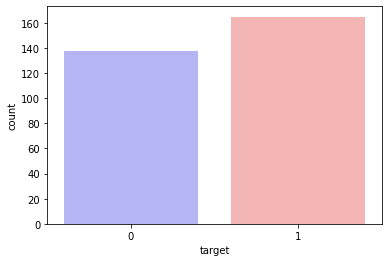

In [38]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

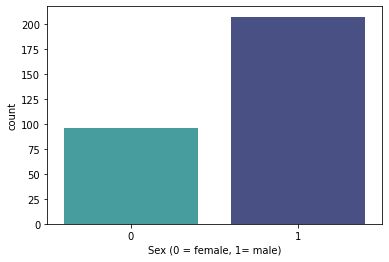

In [39]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

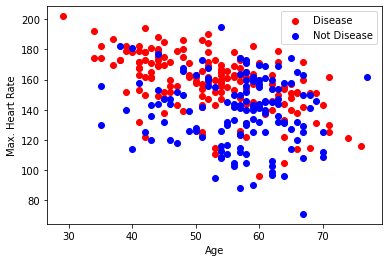

In [40]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'blue')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.show()

In [41]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

In [42]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [43]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(14.5, -0.5)

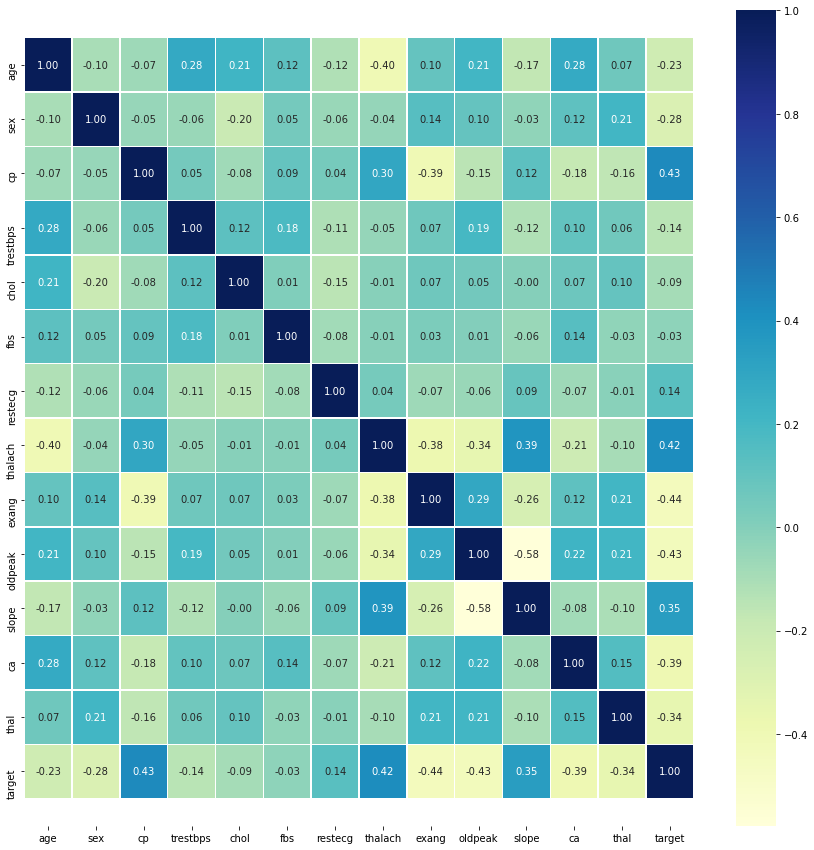

In [61]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Shuffle Data between techniques:

In [62]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [63]:
data = data.sample(frac=1)

In [64]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1


Kmean Nearest Neighbor Classification:

In [65]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

In [66]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [68]:
print(cm)

[[21  6]
 [ 5 29]]


In [69]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


Confusion matrix, without normalization
[[21  6]
 [ 5 29]]
Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.14705882 0.85294118]]


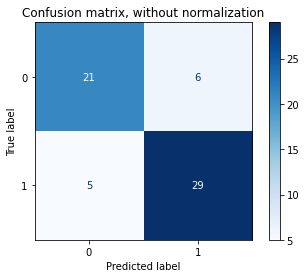

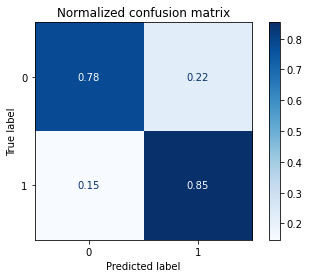

In [70]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [84]:
def knn_comparison(data, k):
    clf = data.KNeighborsClassifier (n_neighbors=k)
    clf.fit(X, y)
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('KNN')
    plt.show()
knn_comparison

<function __main__.knn_comparison(data, k)>

Naive Bayes Classification:

In [71]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
yPred = classifier.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Gaussian Naive Bayes :
Accuracy =  0.819672131147541
Mean Squared Error: 0.18032786885245902
R score: 0.2690631808278867
Mean Absolute Error: 0.18032786885245902


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = df.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))


AttributeError: 'DataFrame' object has no attribute 'KNeighborsClassifier'